In [10]:
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import norm
import statistics
  

In [19]:
com = pd.read_csv("C:\\Users\\Arzhang\\PycharmProjects\\getRedditData\\Comments_CSV\\hacking_comments.csv")
sub = pd.read_csv("C:\\Users\\Arzhang\\PycharmProjects\\getRedditData\\Submissions_CSV\\hacking_submissions.csv")

data = pd.concat([sub, com])
data['Date'] = pd.to_datetime(data['Date'])

data["day-month-yr"]= 0 
data["day-month-yr"] = data["Date"].dt.to_period("D")

data.to_csv("C:\\Users\\Arzhang\\PycharmProjects\\getRedditData\\Sub_and_Com_CSV\\hacking.csv")
print(data.Date[0])


data = pd.concat([sub, com])
data = data[data.Username != '[deleted]' ]
print(data.Date[0])
print(type(data.Date[0]))
data["Number of Posts by User"] = 0
data["Posts Per Thread"] = 0
new_df = data.groupby(['Username'])['Number of Posts by User'].agg('count').reset_index()
new_df = new_df.sort_values(by='Number of Posts by User', ascending=False)
average_numeber_posts_per_active_user = new_df['Number of Posts by User'].mean()
print("The average number of posts for active users is: " + str(average_numeber_posts_per_active_user)+ "\n")
number_of_users_posting = len(new_df)
new_df = new_df[new_df.Username != '[deleted]' ]
top_ten_users = new_df.head(10)
display(top_ten_users)

new_df = data.groupby(['Post ID'])['Posts Per Thread'].agg('count').reset_index()
new_df = new_df.sort_values(by='Posts Per Thread', ascending=False)

top_ten_threads = new_df.head(10)
display(top_ten_threads)
data['Date'] = pd.to_datetime(data['Date'])
print(data.Date[0])
data = data.sort_values(by='Date', ascending=False)
display(data)


0   2008-04-25 21:01:26
0   2008-08-03 02:13:18
Name: Date, dtype: datetime64[ns]
0    2008-04-25 21:01:26
0    2008-08-03 02:13:18
Name: Date, dtype: object
<class 'pandas.core.series.Series'>
The average number of posts for active users is: 4.090175373307903



,Username,Number of Posts by User
8794,AutoModerator,25330
38008,InfosecMod,4914
23765,DrinkMoreCodeMore,3665
120651,iCkerous,2440
152758,securityaffairs,2241
81328,Tompazi,1967
36407,IUsedToBeACave,1683
136490,misconfig_exe,1449
122888,iownahorsefurreal,1311
126417,josh109,1294


,Post ID,Posts Per Thread
39168,70cv5w,1434
54023,9qyj0q,729
36250,6i1c2i,512
39062,6zt2tp,503
26558,4up17b,503
40433,78ugci,502
37201,6otywi,500
49942,9258af,443
48667,8trjae,443
54994,9xdudy,433


0   2008-04-25 21:01:26
0   2008-08-03 02:13:18
Name: Date, dtype: datetime64[ns]


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,Post ID,Comment ID,Username,Body,Subreddit,Date,Score,Embedded URL,URL,Unnamed: 0.1.1.1.1,Number of Posts by User,Posts Per Thread
683305,683305,683305,683305,683305,1005ate,j2fue1r,maximum_powerblast,No,hacking,2022-12-31 23:35:36,4,NaN,NaN,683305.0,0,0
683304,683304,683304,683304,683304,1004iav,j2fu1bf,DoubleOwl7777,just get a free vpn like protonvpn free tier. ...,hacking,2022-12-31 23:32:58,2,NaN,NaN,683304.0,0,0
683303,683303,683303,683303,683303,zzm9dh,j2ft2ry,pewterrr,cTos,hacking,2022-12-31 23:25:48,1,NaN,NaN,683303.0,0,0
683302,683302,683302,683302,683302,10057vr,j2fsmfy,GItPirate,Delete this post before you get banned,hacking,2022-12-31 23:22:19,1,NaN,NaN,683302.0,0,0
683300,683300,683300,683300,683300,10057vr,j2fs2y9,flyingmonkey45,Do it yourself tard,hacking,2022-12-31 23:18:12,1,NaN,NaN,683300.0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,5,5,5,5,6tcw9,6tcw9,ratzero,NaN,hacking,2008-07-24 20:13:19,2,http://www.government.pn/PnRegistry/PnRegistry...,https://www.reddit.com//r/hacking/comments/6tc...,NaN,0,0
4,4,4,4,4,6qa6y,6qa6y,dave_L,NaN,hacking,2008-07-04 09:12:46,0,http://forum.kaspersky.com/index.php?showtopic...,https://www.reddit.com//r/hacking/comments/6qa...,NaN,0,0
3,3,3,3,3,6huem,6huem,pkrumins,NaN,hacking,2008-05-01 14:48:47,3,http://www.catonmat.net/blog/videos-from-defco...,https://www.reddit.com//r/hacking/comments/6hu...,NaN,0,0
2,2,2,2,2,6hkk5,6hkk5,pkrumins,NaN,hacking,2008-04-29 13:32:55,2,http://www.openrce.org,https://www.reddit.com//r/hacking/comments/6hk...,NaN,0,0


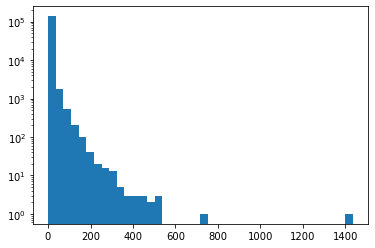

In [5]:
#CCDF of user posting frequency:X-axis: number of posts Y-axis: Percentage of users posting this many posts


users_posts ={}
for i, row in data.iterrows():
    if row["Post ID"] not in users_posts:
        users_posts[row["Post ID"]] = 1 
    else: 
        users_posts[row["Post ID"]] += 1
        
x = []
for key, val in users_posts.items():
    x.append(val)
plt.hist(x, 40)
#plt.xlim(0,100)
plt.yscale('log')
plt.show()
    

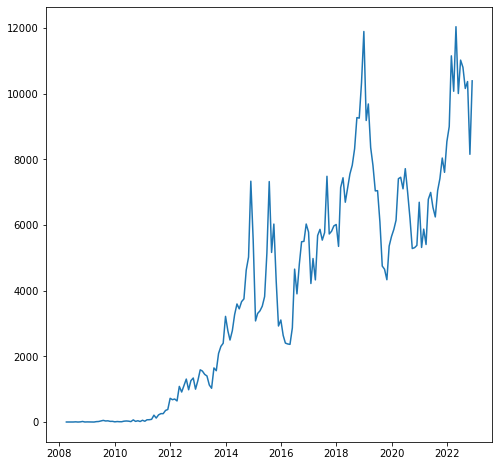

In [14]:
date_dict = {}
new_data = data 
new_data["mnth-yr"] = 0

new_data["mnth-yr"] = data["Date"].dt.to_period("M")

x, y = [], []

for i, row in new_data.iterrows():
    if row["mnth-yr"] not in date_dict:
        date_dict[row["mnth-yr"]]= 1 
    else: 
        date_dict[row["mnth-yr"]] += 1
        

for key, val in date_dict.items():
    x.append(pd.to_datetime((str(key.year) + "-" + str(key.month))))
    y.append(val)
fig, ax = plt.subplots(figsize=(8, 8))
ax.plot(x, y);

    

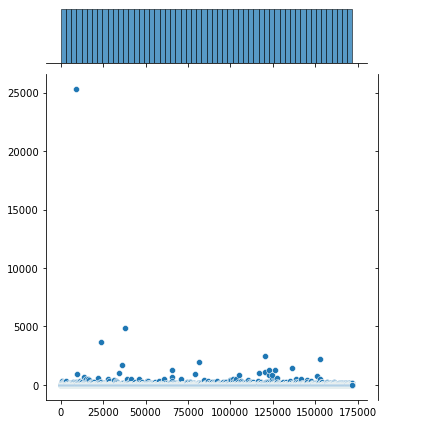

In [15]:
new_df = data.groupby(['Username'])['Number of Posts by User'].agg('count').reset_index()
col_1 = np.array(new_df['Number of Posts by User'])
col_3 = np.array(range(0, len(new_df['Number of Posts by User'])))

sns.jointplot(x=col_3, y=col_1)

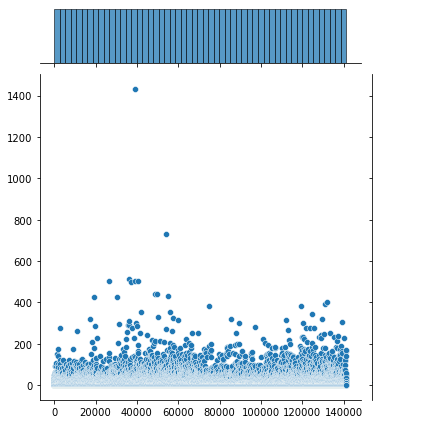

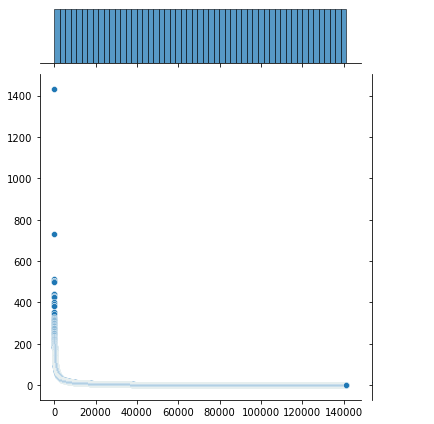

In [16]:

posts_per_thread = data.groupby(['Post ID'])['Posts Per Thread'].agg('count').reset_index()
posts_per_thread = data.groupby(['Post ID'])['Posts Per Thread'].agg('count').reset_index()

col_1 = np.array(posts_per_thread['Posts Per Thread'])
col_3 = np.array(range(0, len(posts_per_thread['Posts Per Thread'])))

sns.jointplot(x=col_3, y=col_1)
posts_per_thread = posts_per_thread.sort_values(by='Posts Per Thread', ascending=False)\

col_1 = np.array(posts_per_thread['Posts Per Thread'])
col_3 = np.array(range(0, len(posts_per_thread['Posts Per Thread'])))
sns.jointplot(x=col_3, y=col_1)


,Post ID,Username,Posts Per Thread
0,10008p4,PaintedBlack777,[0]
1,1000wo,Amator,[0]
2,1001cgi,AutoModerator,[0]
3,1001fzh,donttouchmyhohos,[0]
4,1004iav,Denzel09,[0]
5,1004iav,DoubleOwl7777,[0]
6,1004iav,Sea-Profession-3312,[0]
7,1004iav,Trash_Space_Racoon,[0]
8,1004qb,gregthegeek1,[0]
9,1004xii,13AccentVA,[0]


,Post ID,Posts Per Thread
0,10008p4,1
1,1000wo,1
2,1001cgi,1
3,1001fzh,1
4,1004iav,4
...,...,...
141235,zzwbdm,9
141236,zzyqau,2
141237,zzys88,1
141238,zzzbfs,1


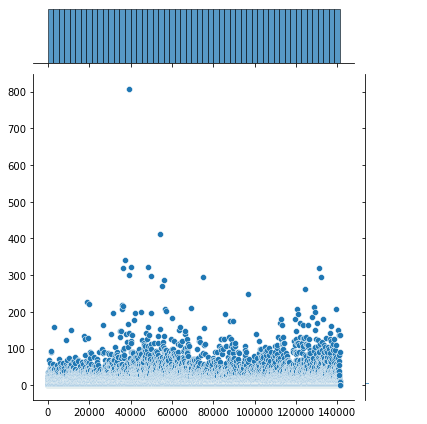

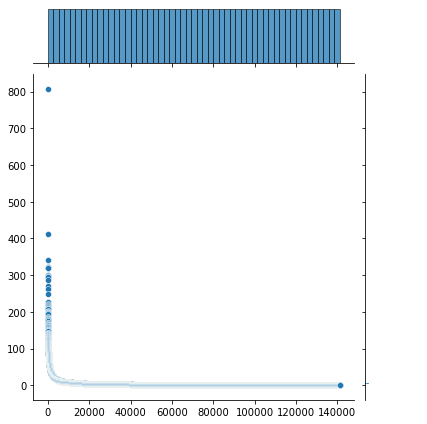

In [17]:
#X-axis: Unique users interacting in a thread, y-axis: # of threads that have this (histogram)
posts_per_thread = data.groupby(['Post ID','Username'])['Posts Per Thread'].agg('unique').reset_index()
display(posts_per_thread.head(20))
posts_per_thread = posts_per_thread.groupby(['Post ID'])['Posts Per Thread'].agg('count').reset_index()
display(posts_per_thread)

col_1 = np.array(posts_per_thread['Posts Per Thread'])
col_3 = np.array(range(0, len(posts_per_thread['Posts Per Thread'])))

sns.jointplot(x=col_3, y=col_1)
posts_per_thread = posts_per_thread.sort_values(by='Posts Per Thread', ascending=False)\

col_1 = np.array(posts_per_thread['Posts Per Thread'])
col_3 = np.array(range(0, len(posts_per_thread['Posts Per Thread'])))
sns.jointplot(x=col_3, y=col_1)

,Number of Unique Users,Number of Threads with Unique users
0,1,70153
1,2,30294
2,3,10226
3,4,7273
4,5,5285
...,...,...
185,319,2
186,322,2
187,342,1
188,412,1


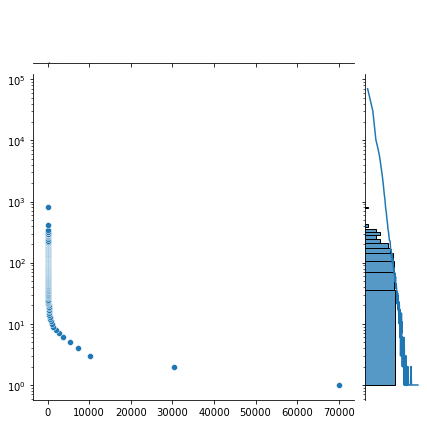

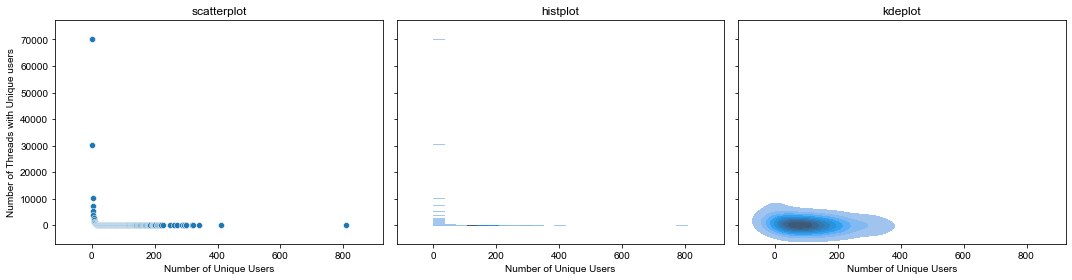

In [18]:
#X-axis: Unique users interacting in a thread, y-axis: # of threads that have this (histogram)
data['Number of Unique Users'] = 0
posts_per_thread = data.groupby(['Post ID','Username'])['Number of Unique Users'].agg('unique').reset_index()
posts_per_thread = posts_per_thread.groupby(['Post ID'])['Number of Unique Users'].agg('count').reset_index()
#posts_per_thread = posts_per_thread.groupby(['Post ID'])['Number of Unique Users'].agg('count').reset_index()




#posts_per_thread = posts_per_thread.sort_values(by='Number of Unique Users', ascending=True)

 


#isplay(posts_per_thread.head(20))
data_dict = {}
posts_per_thread["Number of Threads with Unique users"]  = 0 
new_df = posts_per_thread.groupby(['Number of Unique Users'])['Number of Threads with Unique users'].agg('count').reset_index()
display(new_df)

new_df = new_df.astype({'Number of Threads with Unique users':'int'})
new_df = new_df.astype({'Number of Unique Users':'int'})
new_df = new_df.astype({'Number of Threads with Unique users':'int'})

col_1 = np.array(new_df["Number of Unique Users"])
col_3 = np.array(new_df['Number of Threads with Unique users'] ) 
sns.jointplot(x=col_3, y=col_1)


plt.loglog(col_1,col_3)
plt.show()
#plt.xscale('log')
#plt.yscale('log')                      

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(15, 4), sharex=True, sharey=True)

sns.set_style('darkgrid')
sns.scatterplot(x=new_df["Number of Unique Users"], y=new_df['Number of Threads with Unique users'], ax=ax1)
sns.histplot(x=new_df["Number of Unique Users"], y=new_df['Number of Threads with Unique users'], ax=ax2)
sns.kdeplot(x=new_df["Number of Unique Users"], y=new_df['Number of Threads with Unique users'], fill=True, ax=ax3)

ax1.set_title('scatterplot')
ax2.set_title('histplot')
ax3.set_title('kdeplot')
plt.tight_layout()
plt.show()

    